# Train linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/clean.csv', index_col=0).drop(columns=["Unnamed: 6"], errors='ignore')
df.sample(5)

,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,log_duration,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,ร้องเรียน,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
431822,3867,3.950000,74.560000,66577.0,10.759200,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
179790,1407,3.950000,74.560000,66577.0,8.509564,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23023,1298,3.920000,72.750000,140755.0,9.667069,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
753307,847,3.556667,88.706667,128981.0,10.343483,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
377602,0,4.010000,77.490000,80103.0,9.089302,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.shape

(645663, 30)

In [4]:
df.columns

Index(['until_working_time', 'avg_star', 'post_finish_percentage',
       'avg_duration_minutes_finished', 'log_duration', 'ป้าย', 'ความสะอาด',
       'แสงสว่าง', 'สอบถาม', 'ร้องเรียน', 'การเดินทาง', 'จราจร', 'ท่อระบายน้ำ',
       'สะพาน', 'เสียงรบกวน', 'ต้นไม้', 'คนจรจัด', 'คลอง', 'ถนน', 'เสนอแนะ',
       'กีดขวาง', 'สายไฟ', 'PM2.5', 'น้ำท่วม', 'ทางเท้า', 'สัตว์จรจัด',
       'ความปลอดภัย', 'ห้องน้ำ', 'ป้ายจราจร', 'Others'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
target = 'log_duration'
X = df.drop(target, axis=1)
# X = df[['until_working_time']]
y = df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
X_train.shape

(516530, 29)

In [9]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
# print the intercept
print(lm)
print(lm.intercept_)
print(lm.n_features_in_)
print(lm.feature_names_in_)

LinearRegression()
8.641200825773275
29
['until_working_time' 'avg_star' 'post_finish_percentage'
 'avg_duration_minutes_finished' 'ป้าย' 'ความสะอาด' 'แสงสว่าง' 'สอบถาม'
 'ร้องเรียน' 'การเดินทาง' 'จราจร' 'ท่อระบายน้ำ' 'สะพาน' 'เสียงรบกวน'
 'ต้นไม้' 'คนจรจัด' 'คลอง' 'ถนน' 'เสนอแนะ' 'กีดขวาง' 'สายไฟ' 'PM2.5'
 'น้ำท่วม' 'ทางเท้า' 'สัตว์จรจัด' 'ความปลอดภัย' 'ห้องน้ำ' 'ป้ายจราจร'
 'Others']


In [11]:
# coeff_df = pd.DataFrame(lm.coef_,lm.feature_names_in_,columns=['Coefficient'])
# coeff_df

In [12]:
predictions = lm.predict(X_test)

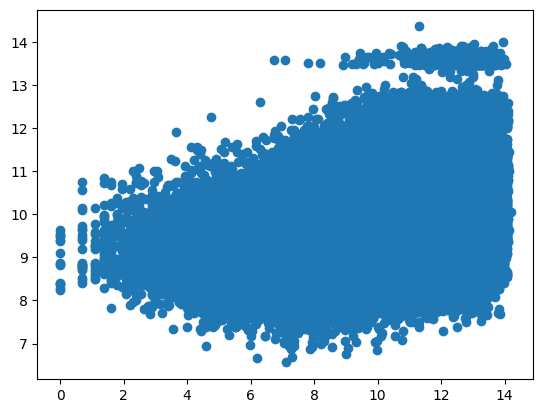

In [13]:
plt.scatter(x=y_test, y=predictions)

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.7035863569571628
MSE: 4.465084923273592
RMSE: 2.113074755722947


# Random Forest regressor

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv("data/clean.csv")
df = df.drop(columns='duration')
# df = df.sample(200000)
df.sample(5)

,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,ร้องเรียน,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
197317,9.298717,887,3.78,76.75,95972.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47379,8.099858,97,3.98,79.63,64430.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
293093,7.072422,0,4.00,86.02,65512.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341285,10.875818,734,3.81,84.12,87839.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440186,9.963783,752,3.92,72.75,140755.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [144]:
# Assuming df is your DataFrame with all features + 'duration' target
X = df.drop(columns=['log_duration'])
y = df['log_duration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Model: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


y_test = np.exp(y_test).tolist()
y_pred = np.exp(y_pred).tolist()

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R²: {r2:.2f}")

KeyboardInterrupt: 

In [ ]:
import pickle
# Open file - Write binary mode
model_file = open('model/random_forest.model', 'wb')

# Save Decision tree model
pickle.dump(model, model_file)

# Close file
model_file.close()

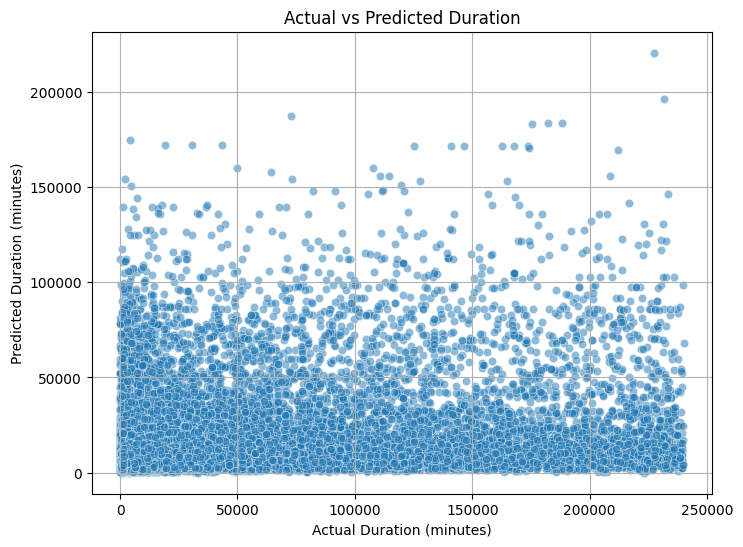

/home/teegooodgood/documents/uni/sem3-2/datasci/traffy-sunglui/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/teegooodgood/documents/uni/sem3-2/datasci/traffy-sunglui/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/teegooodgood/documents/uni/sem3-2/datasci/traffy-sunglui/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/teegooodgood/documents/uni/sem3-2/datasci/traffy-sunglui/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.c

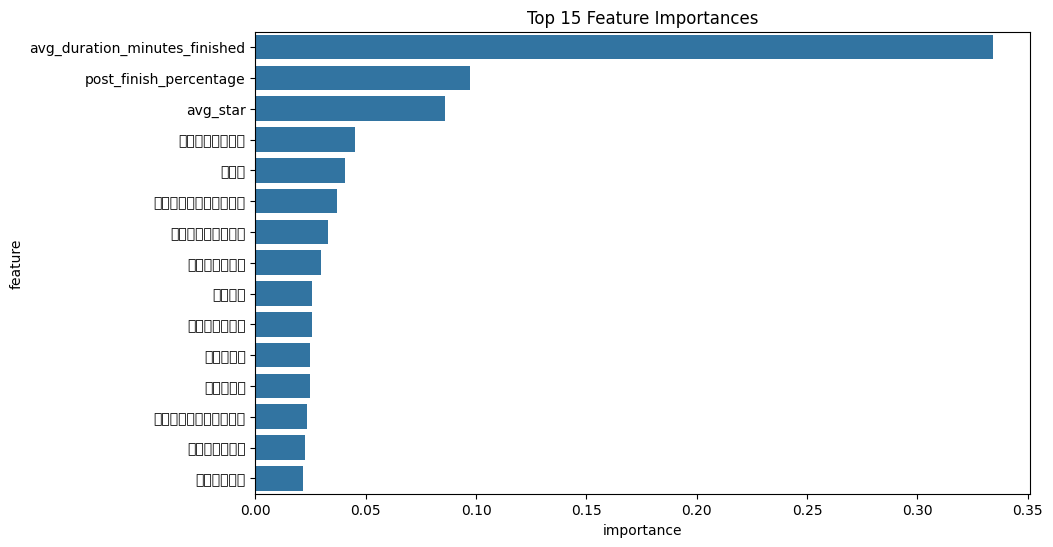

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Actual vs Predicted Duration')
plt.grid(True)
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.show()


# SGDRegressor

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
df = pd.read_csv("data/clean.csv")
df = df.drop(columns='duration')
df.sample(5)

,log_duration,until_working_time,avg_star,post_finish_percentage,avg_duration_minutes_finished,ป้าย,ความสะอาด,แสงสว่าง,สอบถาม,ร้องเรียน,...,กีดขวาง,สายไฟ,PM2.5,น้ำท่วม,ทางเท้า,สัตว์จรจัด,ความปลอดภัย,ห้องน้ำ,ป้ายจราจร,Others
346026,11.644313,0,4.13,85.340000,113798.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571605,11.408453,3684,4.00,76.516667,142796.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222434,10.456021,57,3.79,78.930000,101553.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366528,11.702694,0,3.93,80.690000,80904.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340770,13.072444,113,3.75,80.660000,84368.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607622 entries, 0 to 607621
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   log_duration                   607622 non-null  float64
 1   until_working_time             607622 non-null  int64  
 2   avg_star                       607622 non-null  float64
 3   post_finish_percentage         607622 non-null  float64
 4   avg_duration_minutes_finished  607622 non-null  float64
 5   ป้าย                           607622 non-null  int64  
 6   ความสะอาด                      607622 non-null  int64  
 7   แสงสว่าง                       607622 non-null  int64  
 8   สอบถาม                         607622 non-null  int64  
 9   ร้องเรียน                      607622 non-null  int64  
 10  การเดินทาง                     607622 non-null  int64  
 11  จราจร                          607622 non-null  int64  
 12  ท่อระบายน้ำ                   

In [27]:
def stream_data(df, batch_size):
    for i in range(0, len(df), batch_size):
        yield df.iloc[i:i+batch_size]

In [28]:
LOSS_FUNCTION = 'huber' 
BATCH_SIZE = 64

In [29]:
model = SGDRegressor(loss=LOSS_FUNCTION)  # or 'squared_loss'
scaler = StandardScaler()

In [30]:
# For visualization
y_true_all, y_pred_all = [], []

# Example data stream
for batch in stream_data(df, batch_size=BATCH_SIZE):
    X = batch.drop(columns=['log_duration'])
    y = batch['log_duration']

    # Normalize input features
    scaler.fit(X)
    model.partial_fit(scaler.transform(X), y)

    y_pred = model.predict(scaler.transform(X))

    y_true_all.extend(y)
    y_pred_all.extend(y_pred)

y_true_all = np.expm1(y_true_all).tolist()
y_pred_all = np.expm1(y_pred_all).tolist()

In [31]:
# Evaluation
mae = mean_absolute_error(y_true_all, y_pred_all)
rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
r2 = r2_score(y_true_all, y_pred_all)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 103861.58
RMSE: 225381.48
R²: -0.25


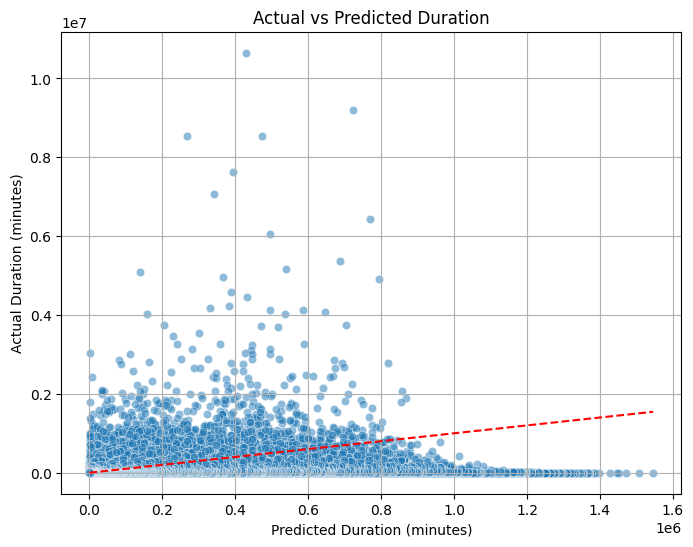

In [32]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true_all, y=y_pred_all, alpha=0.5)
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], '--', color='red')
plt.ylabel('Actual Duration (minutes)')
plt.xlabel('Predicted Duration (minutes)')
plt.title('Actual vs Predicted Duration')
plt.grid(True)
plt.show()